# **Multiple Linear Regression**

## **Data Preprocessing**

In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset_path = '/content/50_Startups.csv'
dataset = pd.read_csv(dataset_path)
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [6]:
#this is 2 ways of spliting the dataset to x, y
X = dataset.iloc[:, :4]
Y = dataset['Profit']

In [7]:
print(X.head())

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida


In [8]:
print(Y.head())

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


 ⏳  **After encoding we have a dummy columns** ⬇

**↪Do we have to do any thing to avoid the dummy variable trap ⁉**

**No, the Multiple linear regression class that we will import to make the model and train it will automaticall avoid this trap**



---

**↪Do we have to work on features to select the best ones (with some tichniques like 'backward elimination') ??**

**No , the class handle this also**

In [10]:
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

**we do not have to apply feature scaling, why⁉**

as the hyposethis is:
```
y = b0 + b1x1 + b2x2 + ......
```
so the parameters(B's) affect how the values of each feature help in making the decision





In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

## **Training Multiple Linear Regression model on Training set**

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## **Predicting the Test set results**

**reshape(rows, cols) ▶ convert the shape of vector**

In [19]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.values.reshape(len(Y_test), 1)), 1)) #so here we print the Y_pred, Y_test vertically
#(reshape) method is available for NumPy arrays.we need to access the NumPy array values of the Series using .values before reshaping.
#second parameter is axis and have 2 values -> 0 means vertical concatenation and 1 means horizontal concatenation

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## **Visualizing the difference between Actual and Predicted Values**

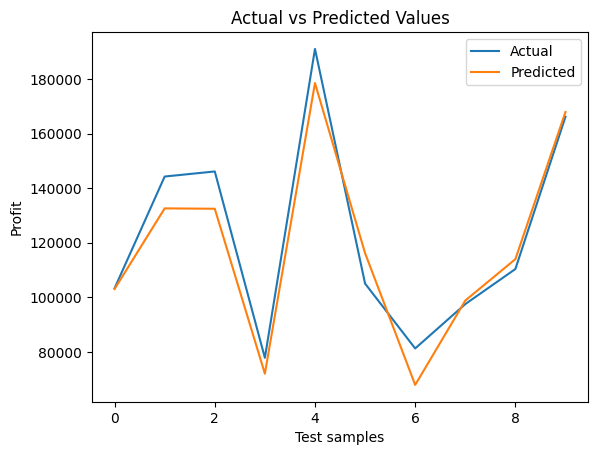

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(Y_test.values, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.xlabel('Test samples')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()